In [1]:
import numpy as np
import tensorflow as tf

from keras.models import Sequential
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,GlobalAveragePooling2D

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [2]:

train_val_dir = "C:\\Users\\soumy\\Documents\\Coading\\Q3\\train_val"
test_dir = "C:\\Users\\soumy\\Documents\\Coading\\Q3\\test"
train_val_labels = pd.read_csv('train_val.csv')

In [60]:

images_tr = []
labels_tr = []
for filename in os.listdir(train_val_dir):
    if filename.endswith('.png'):

        img = cv2.imread(os.path.join(train_val_dir, filename))
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


        img_array = np.array(img)

        images_tr.append(img_array)
        labels_tr.append(filename)


le = LabelEncoder()
labels = le.fit_transform(labels_tr)


images_tr = np.array(images_tr)
labels_tr = np.array(labels_tr)

np.save('x_train.npy', images_tr)
np.save('y_train.npy', labels_tr)
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')

In [61]:

images_v = []
labels_v = []
for filename in os.listdir(test_dir):
    if filename.endswith('.png'):


        img = cv2.imread(os.path.join(test_dir, filename))
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


        img_array = np.array(img)

        images_v.append(img_array)
        labels_v.append(filename)

le = LabelEncoder()
labels = le.fit_transform(labels)


images_v = np.array(images_v)
labels_v = np.array(labels_v)

np.save('x_test.npy', images_v)
np.save('y_test.npy', labels_v)
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')


In [62]:

image_classes = ['line', 'dot_line', 'hbar_categorical', 'vbar_categorical', 'pie']


In [63]:


label_map = {'line': 0, 'dot_line': 1, 'hbar_categorical': 2, 'vbar_categorical': 3, 'pie': 4}
y_train = np.array([label_map[label] for label in train_val_labels['type']])
y_train
y_train.shape
y_test.shape


(50,)

In [64]:

def image_sample(x, y, index):
    plt.figure(figsize = (10,2))
    plt.imshow(x[index])

    plt.xlabel(image_classes[y[index]])

In [65]:
#scaling
x_train=x_train /255
x_test=x_train /255

In [66]:
y_train_index = train_val_labels['image_index']
y_train_type = train_val_labels['type']

In [67]:
model = Sequential([
    Flatten(input_shape=(128,128,3)),
    Dense(2000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(10, activation='softmax')
])
# Compile the model
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
32/32 [==============================] - 5s 134ms/step - loss: 7.2543 - accuracy: 0.2070
Epoch 2/5
32/32 [==============================] - 4s 133ms/step - loss: 1.7003 - accuracy: 0.2030
Epoch 3/5
32/32 [==============================] - 4s 137ms/step - loss: 1.6688 - accuracy: 0.2210
Epoch 4/5
32/32 [==============================] - 4s 134ms/step - loss: 1.6481 - accuracy: 0.2640
Epoch 5/5
32/32 [==============================] - 4s 136ms/step - loss: 1.6425 - accuracy: 0.2750


In [50]:

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [51]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 3s 42ms/step - loss: 2.0098 - accuracy: 0.1650


[2.0097625255584717, 0.16500000655651093]

In [52]:
y_pred = model.predict(x_test)
y_pred
y_pred_classes = [np.argmax(ele) for ele in y_pred]

7/7 [==============================] - 0s 39ms/step


In [53]:

model_cnn = Sequential([
    Conv2D(filters=16 ,kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])

model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

his = model_cnn.fit(x_train, y_train, batch_size=1000, epochs=20,validation_data=(x_test, y_test))

Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 1.6094 - accuracy: 0.2025 - val_loss: 1.6099 - val_accuracy: 0.1650
Epoch 2/50
1/1 [==============================] - 2s 2s/step - loss: 1.6093 - accuracy: 0.2087 - val_loss: 1.6113 - val_accuracy: 0.1650
Epoch 3/50
1/1 [==============================] - 1s 1s/step - loss: 1.6091 - accuracy: 0.2087 - val_loss: 1.6142 - val_accuracy: 0.1650
Epoch 4/50
1/1 [==============================] - 1s 1s/step - loss: 1.6089 - accuracy: 0.2087 - val_loss: 1.6184 - val_accuracy: 0.1650
Epoch 5/50
1/1 [==============================] - 1s 1s/step - loss: 1.6091 - accuracy: 0.2087 - val_loss: 1.6169 - val_accuracy: 0.1650
Epoch 6/50
1/1 [==============================] - 1s 1s/step - loss: 1.6090 - accuracy: 0.2087 - val_loss: 1.6146 - val_accuracy: 0.1650
Epoch 7/50
1/1 [==============================] - 1s 1s/step - loss: 1.6089 - accuracy: 0.2087 - val_loss: 1.6133 - val_accuracy: 0.1650
Epoch 8/50
1/1 [=========================

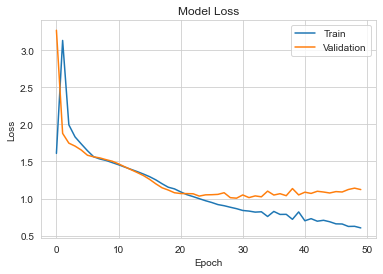

In [17]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [18]:
model_cnn.evaluate(x_test,y_test)

7/7 [==============================] - 0s 12ms/step - loss: 1.1211 - accuracy: 0.6100


[1.1210540533065796, 0.6100000143051147]

In [19]:
y_pred = model_cnn.predict(x_test)

7/7 [==============================] - 0s 29ms/step


In [20]:
y_classes = [np.argmax(element) for element in y_pred]

In [22]:
conf_mat = confusion_matrix(y_test, y_classes)

Text(70.0, 0.5, 'Actual')

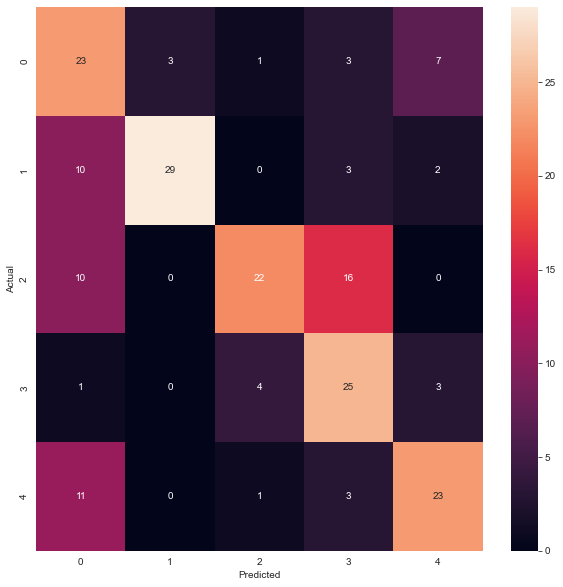

In [23]:
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [25]:
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator


vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [26]:
x = vgg16_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)
pt_model = tf.keras.Model(inputs=vgg16_model.input, outputs=predictions)

In [27]:
for layer in pt_model.layers:
    layer.trainable = False

In [28]:
pt_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [30]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

In [31]:
train_generator = train_datagen.flow(x_train, y_train, batch_size=32)
test_generator = train_datagen.flow(x_test, y_test, batch_size=32)

In [32]:
from keras.callbacks import EarlyStopping

In [33]:
es = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)
history = pt_model.fit(train_generator, epochs=100, validation_data=test_generator, callbacks=[es])

Epoch 1/100


ValueError: in user code:

    File "C:\Users\soumy\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\soumy\anaconda3\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\soumy\anaconda3\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\soumy\anaconda3\lib\site-packages\keras\engine\training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\soumy\anaconda3\lib\site-packages\keras\engine\training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "C:\Users\soumy\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\soumy\anaconda3\lib\site-packages\keras\losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\soumy\anaconda3\lib\site-packages\keras\losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\soumy\anaconda3\lib\site-packages\keras\losses.py", line 1787, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\soumy\anaconda3\lib\site-packages\keras\backend.py", line 5119, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 5) are incompatible
